In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [105]:
import numpy as np
import pandas as pd

In [106]:
import datetime as dt

In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [108]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [109]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [110]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [111]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [112]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [113]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
twelve_months=session.query(measurement.date).order_by(measurement.date.desc()).first()
twelve_months

last_year=dt.date(2017,8,23) - dt.timedelta(days = 365)
print(last_year)


2016-08-23


In [114]:
# Perform a query to retrieve the data and precipitation scores
rain= session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >= last_year)


In [115]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df=pd.DataFrame(rain, columns=['rain','date'])
# Sort the dataframe by date
rain_df.set_index('date')
rain_df.head()

,rain,date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27


Text(0.5, 1.0, 'Rain Over a Year')

<Figure size 720x720 with 0 Axes>

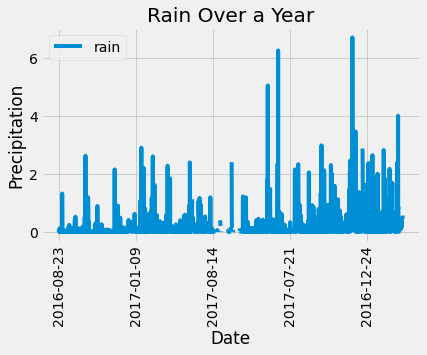

In [116]:
# Use Pandas Plotting with Matplotlib to plot the data
fig_rain=plt.figure(figsize=(10,10))
rain_df.plot('date', 'rain')
plt.tight_layout()
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.savefig('rain.png')
plt.title('Rain Over a Year')


In [117]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,rain
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [118]:
# Design a query to show how many stations are available in this dataset?
stations_total= session.query(station).count()
print(stations_total)

9


In [124]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station, func.count()).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_range = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
temp_range


[(54.0, 85.0, 71.66378066378067)]

In [163]:
temp=session.query(measurement.tobs).\
    filter(measurement.date >= last_year, measurement.station == 'USC00519281').\
    order_by(measurement.tobs).all()
   

In [164]:
temp_df=pd.DataFrame(temp, columns=['Tobs'])
temp_df.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


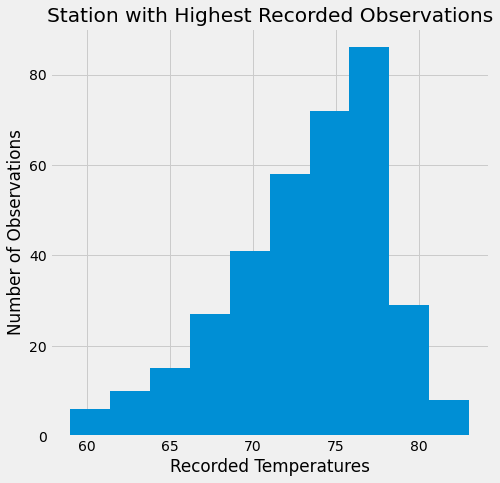

<Figure size 432x288 with 0 Axes>

In [170]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

fig2 = plt.figure(figsize=(7,7))
temp_intel_df = pd.DataFrame(temp_df)
plt.hist(temp_df['Tobs'])
bin_size = 12
plt.xlabel('Recorded Temperatures')
plt.ylabel('Number of Observations')
plt.title('Station with Highest Recorded Observations')
plt.show()
plt.savefig('temp_histogram.png')